### Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Heart.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.shape

(303, 14)

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
import seaborn as sns

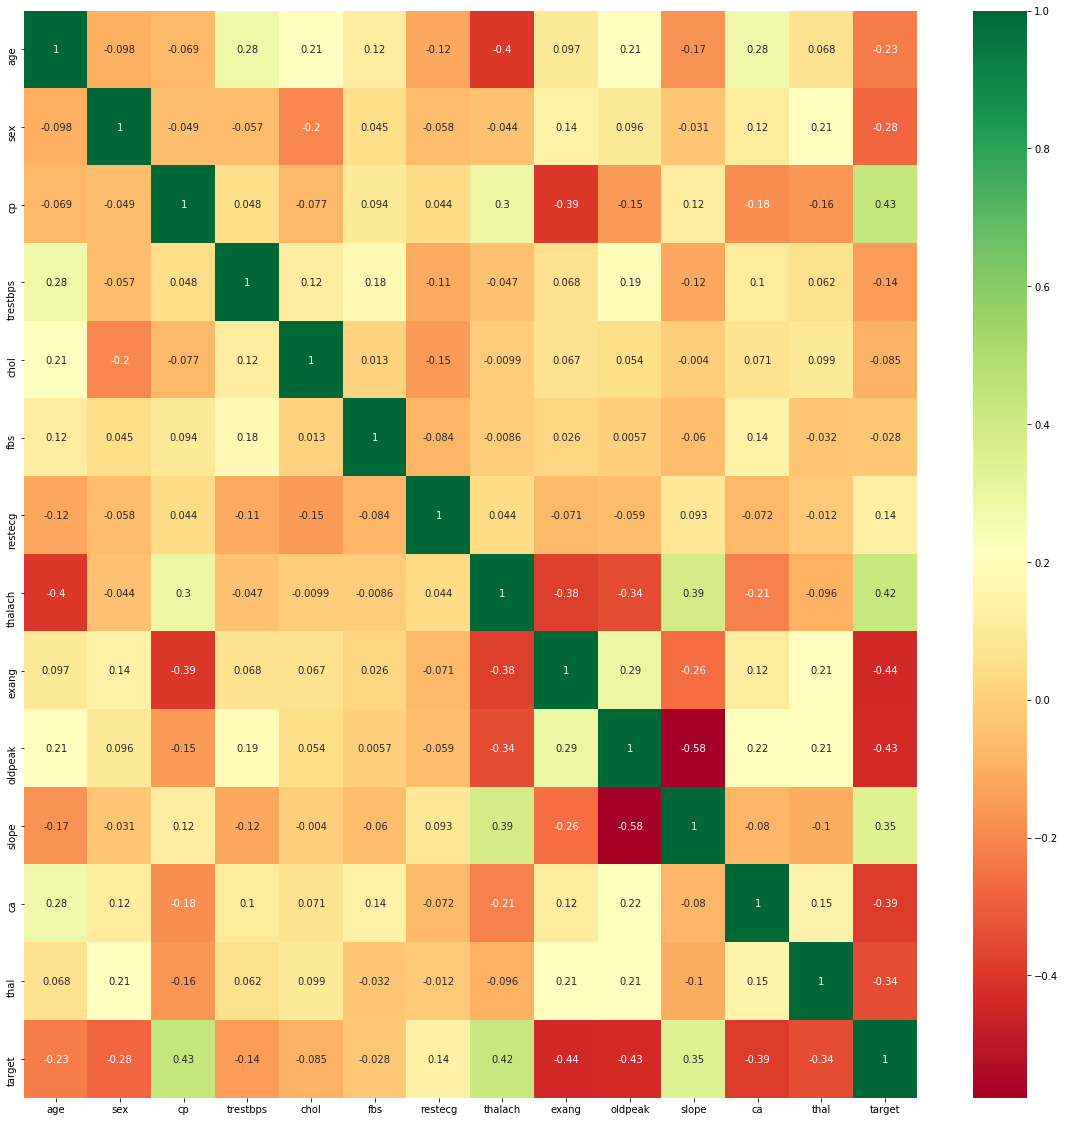

In [9]:
#Ploting the correlation matrix
plt.figure(figsize=(20,20))

sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002919B19CD48>,
      dtype=object)

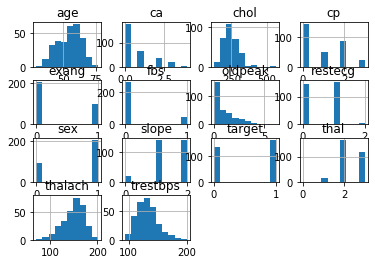

In [10]:

dataset.hist()

In [11]:
X=dataset.drop('target',axis=1)
Y=dataset['target']

In [12]:
X.shape,Y.shape

((303, 13), (303,))

### Trying KNearestNeighbors Algorithm WithOut Scaling

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [14]:
K_scores=[]

for k in range(1,21):
    
    neighbors_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(neighbors_classifier,X,Y,cv=10,n_jobs=-1,verbose=True)# this will give 10 differnt values for single k value
    K_scores.append(score.mean())

print("Twenty differrnt scores are:",K_scores)    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10

Twenty differrnt scores are: [0.594516129032258, 0.5646236559139786, 0.6272043010752688, 0.6038709677419355, 0.6535483870967742, 0.656989247311828, 0.6734408602150538, 0.6504301075268818, 0.6604301075268817, 0.6407526881720429, 0.666989247311828, 0.6670967741935483, 0.6573118279569892, 0.6704301075268818, 0.6705376344086023, 0.6668817204301075, 0.6634408602150538, 0.6470967741935485, 0.6568817204301075, 0.6535483870967742]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


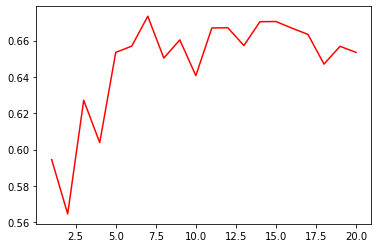

In [15]:
plt.plot([k for k in range(1,21)],K_scores,color='red')


Text(0.5, 1.0, 'K Neighbors classifier with diffent value of k and its score')

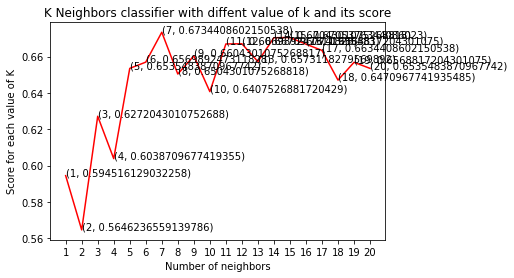

In [16]:

plt.plot([k for k in range(1,21)],K_scores,color='red')


for i in range(1,21):
    plt.text(i,K_scores[i-1],(i,K_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of neighbors')
plt.ylabel('Score for each value of K')
plt.title('K Neighbors classifier with diffent value of k and its score')

In [17]:
np.array(K_scores).mean()

0.6473010752688173

## Data Preprocessing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.



In [18]:
dataset= pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


In [20]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [21]:
X=dataset.drop(['target'],axis=1)
Y=dataset['target']

In [22]:
K_scores=[]

for k in range(1,21):
    
    neighbors_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(neighbors_classifier,X,Y,cv=10,n_jobs=-1,verbose=True)# this will give 5 differnt values for single k value
    K_scores.append(score.mean())

print("Twenty differrnt scores are:",K_scores)    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10

Twenty differrnt scores are: [0.7455913978494624, 0.7591397849462365, 0.8120430107526883, 0.8053763440860215, 0.8348387096774192, 0.831505376344086, 0.8416129032258064, 0.8417204301075267, 0.8449462365591398, 0.8448387096774193, 0.8381720430107527, 0.8448387096774195, 0.841505376344086, 0.8415053763440861, 0.8280645161290323, 0.8381720430107527, 0.8280645161290323, 0.8249462365591398, 0.821505376344086, 0.8250537634408601]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


Text(0.5, 1.0, 'K Neighbors classifier with diffent value of k and its score')

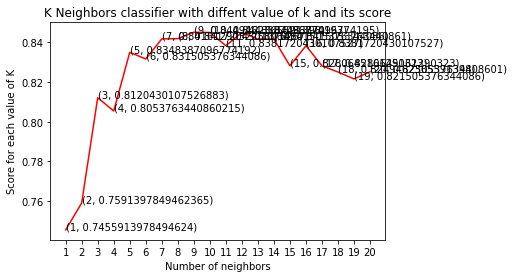

In [23]:
plt.plot([k for k in range(1,21)],K_scores,color='red')


for i in range(1,21):
    plt.text(i,K_scores[i-1],(i,K_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of neighbors')
plt.ylabel('Score for each value of K')
plt.title('K Neighbors classifier with diffent value of k and its score')

##### So I concluded  that after the K=14 the score  is actually decreasing 

In [24]:
k_neighbors=KNeighborsClassifier(n_neighbors=14)
score=cross_val_score(k_neighbors,X,Y,cv=10)

In [25]:
score

array([0.87096774, 0.80645161, 0.87096774, 0.93333333, 0.9       ,
       0.8       , 0.8       , 0.9       , 0.76666667, 0.76666667])

In [26]:
score.mean()

0.8415053763440861

#### So the Best accuracy score we can get with the help of KNN is 0.8415053763440861


## Now lets try with Decision Tree Classifier

In [27]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [28]:
dataset.shape

(303, 31)

In [29]:
X=dataset.drop('target',axis=1)
Y=dataset['target']

In [30]:
X.shape,Y.shape

((303, 30), (303,))

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [32]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [34]:
#from sklearn.tree import DecisionTreeClassifier
#dtc=DecisionTreeClassifier()
#Hyper  parameter Tuning with RandomizedSearchCV,GridSearchCV

criterion=['gini','entropy']

splitter=['best','random']

max_depth=[1,3,5,7]

min_samples_split=[1,2,4,5,6]

min_samples_leaf=[1,2,3,4]

max_features=['log2','sqrt']


parameter={
    'criterion':criterion,
    'splitter':splitter,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

dtc=DecisionTreeClassifier()

randomCV=RandomizedSearchCV(estimator=dtc,param_distributions=parameter,n_iter=5,cv=5,verbose=True,n_jobs=-1)


In [35]:
randomCV.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [36]:
randomCV.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [37]:
randomCV.best_params_

{'splitter': 'random',
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini'}

In [38]:
pred=randomCV.predict(X_test)

In [39]:
pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

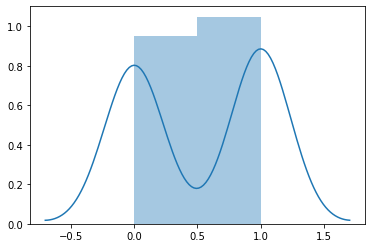

In [40]:
sns.distplot(pred)

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(confusion_matrix(pred,Y_test))
print("Accuracy Score:",accuracy_score(pred,Y_test))
print(classification_report(pred,Y_test))

[[26  3]
 [ 7 25]]
Accuracy Score: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



##### Conclusion 

Accuracy score could have been better if we would have large dataset.
Since our dataset is too small.

In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(randomCV,X,Y,cv=10)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [43]:
score.mean()

0.7588172043010752

### Now Trying With RandomForestClassifier

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [46]:
criterion=['gini','entropy']

n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=10)]

max_depth=[int(x) for x in np.linspace(start=8,stop=150,num=8)]

min_samples_split=[1,2,4,5,6,8,10]

min_samples_leaf=[1,2,3,4,7,8]

max_features=['log2','sqrt']

# Method of selecting samples for trainong each tree

bootstrap=[True,False]

parameter={
    'criterion':criterion,
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'bootstrap':bootstrap
}

rfc=RandomForestClassifier()

randomCV=RandomizedSearchCV(estimator=rfc,param_distributions=parameter,n_iter=5,cv=5,verbose=True,n_jobs=-1)


In [47]:
randomCV.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [48]:
randomCV.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=68, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=733,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
randomCV.best_params_

{'n_estimators': 733,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 68,
 'criterion': 'entropy',
 'bootstrap': True}

In [50]:
randomCV.best_score_

0.8595238095238095

In [51]:
prediction=randomCV.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(confusion_matrix(prediction,Y_test))
print("Accuracy Score:",accuracy_score(prediction,Y_test))
print(classification_report(prediction,Y_test))

[[27  1]
 [ 6 27]]
Accuracy Score: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.96      0.82      0.89        33

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



##### Here with the help of RandomForestClassifier getting very good accuracy score , So the best algorithm for our dataset is RandomForestClassifier